# Task-02
Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.
Sample Dataset :- https://www.kaggle.com/c/titanic/data

#Now,These are the steps I followed in Data Cleaning

#Data Cleaning Steps
1.Load the dataset

2.Identify data types and column names

3.Detect and count missing values

4.Drop irrelevant columns (e.g., PassengerId, Name, Ticket, Cabin)

5.Impute missing values

Fill Age with median,
Fill Embarked with mode

6.Convert categorical variables into numeric format

Encode Sex as 0 and 1,Encode Embarked as 0, 1, 2

7.Treat outliers using the IQR method for Age and Fare

8.Feature engineering / Variable transformation

Create FamilySize = SibSp + Parch + 1,
Apply log transformation on Fare to get Fare_log

9.Re-check for missing values and confirm cleaning



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [6]:
import os
print("Current working directory:", os.getcwd())


Current working directory: /content


In [7]:
from google.colab import files
uploaded = files.upload()


Saving titanic.zip to titanic.zip


In [8]:
import zipfile

with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")


In [9]:
import os

os.listdir("titanic_data")


['train.csv', 'gender_submission.csv', 'test.csv']

In [10]:
import pandas as pd

df = pd.read_csv("titanic_data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Identifying data types

df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [14]:
# Detecting missing values

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
# Dropping irrelevant columns

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [16]:
# Imputing missing values

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

<ipython-input-16-fdf5ec4f3cb6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-16-fdf5ec4f3cb6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [17]:
# Converting categorical to numeric dat

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [18]:
# Outlier treatment - IQR method

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

df['Age'] = cap_outliers(df['Age'])
df['Fare'] = cap_outliers(df['Fare'])

In [19]:
# Feature Engineering - Variable Transformations

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Fare_log'] = np.log1p(df['Fare'])

In [21]:
# final check

df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0
FamilySize,0
Fare_log,0


In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Fare_log
0,0,3,0,22.0,1,0,7.2500,0,2,2.110213
1,1,1,1,38.0,1,0,65.6344,1,2,4.199221
2,1,3,1,26.0,0,0,7.9250,0,1,2.188856
3,1,1,1,35.0,1,0,53.1000,0,2,3.990834
4,0,3,0,35.0,0,0,8.0500,0,1,2.202765


# Done with Data Cleaning-Now I am going to do Exploratory Data Analysis. These are the steps I followed

# EDA Steps

🔸Univariate Analysis (Non-Graphical)

Frequency counts of categorical variables like Survived, Pclass, Sex

🔸 Univariate Analysis (Graphical)

Bar plots for Survived, Pclass, Sex

Histogram for Age

🔸 Bivariate Analysis

Survived vs Sex (bar plot)

Survived vs Pclass (bar plot)

Survived vs Age (boxplot)

🔸 Correlation Analysis

Correlation matrix and heatmap

🔸 Dimensionality Reduction

Apply PCA (Principal Component Analysis) and visualize in 2D plot



In [31]:
# Univariate Analysis - Non Graphical

print(df['Survived'].value_counts())
print()
print(df['Pclass'].value_counts())
print()
print(df['Sex'].value_counts())
print()
print(df['Age'].value_counts())
print()
print(df['SibSp'].value_counts())
print()
print(df['Parch'].value_counts())
print()
print(df['Fare'].value_counts())
print()
print(df['Embarked'].value_counts())


Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex
0    577
1    314
Name: count, dtype: int64

Age
28.0    202
54.5     42
24.0     30
22.0     27
18.0     26
       ... 
20.5      1
23.5      1
53.0      1
24.5      1
34.5      1
Name: count, Length: 65, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Fare
65.6344    116
8.0500      43
13.0000     42
7.8958      38
7.7500      34
          ... 
13.8583      1
50.4958      1
5.0000       1
9.8458       1
10.5167      1
Name: count, Length: 204, dtype: int64

Embarked
0    646
1    168
2     77
Name: count, dtype: int64


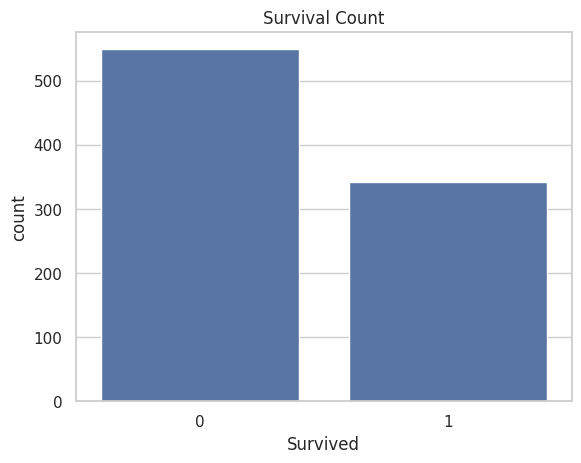

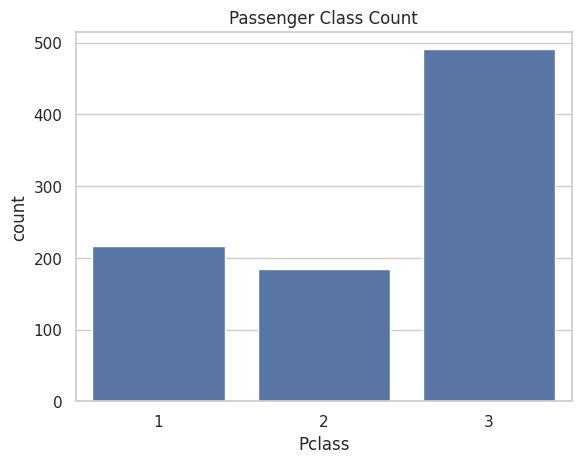

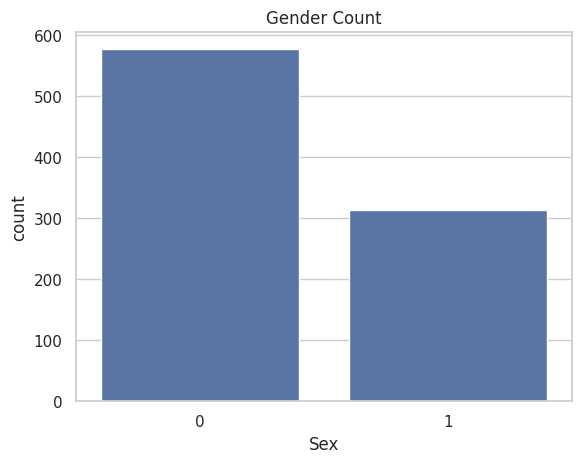

In [42]:
# Univariate Analysis - Graphical

# Barplot for survived
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()
print()

# Barplot for Pclass
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Count')
plt.show()
print()

# Barplot for Sex
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()
print()

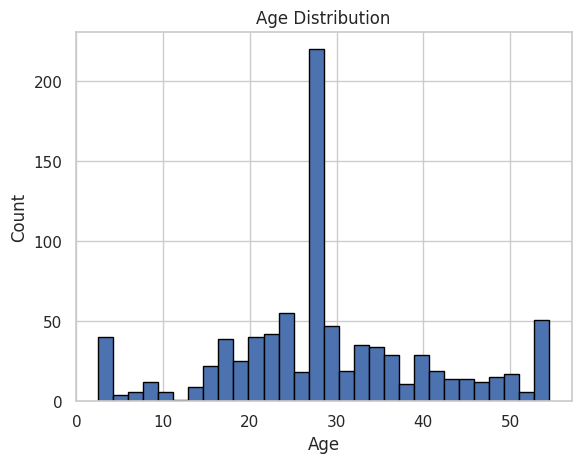

In [43]:
# Age Histogram

plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


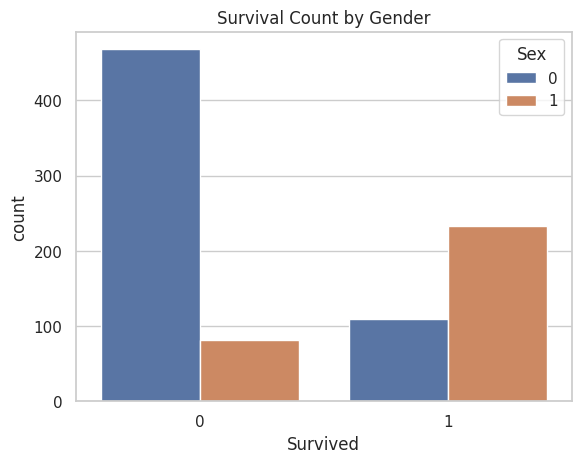

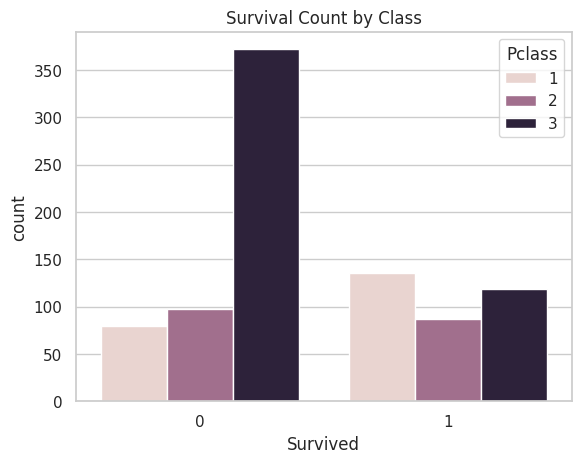

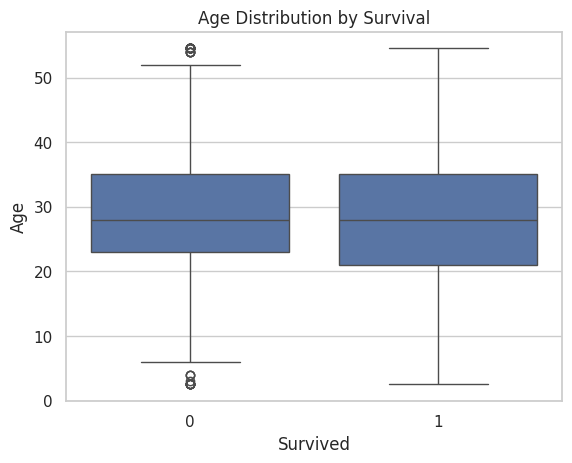

In [44]:
# Bivariate Analysis


# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Gender')
plt.show()

# Survival by Class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Class')
plt.show()

# Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()


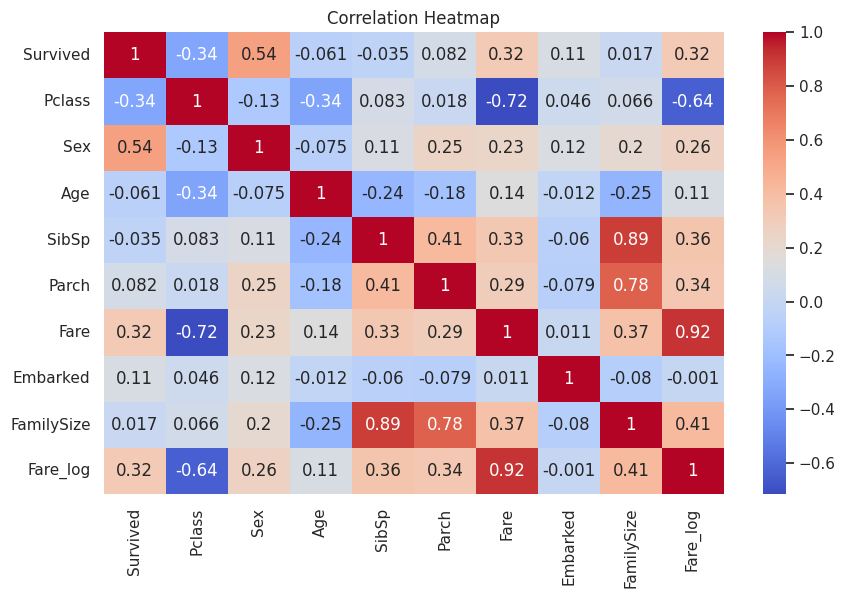

In [37]:
# Correlation Analysis

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

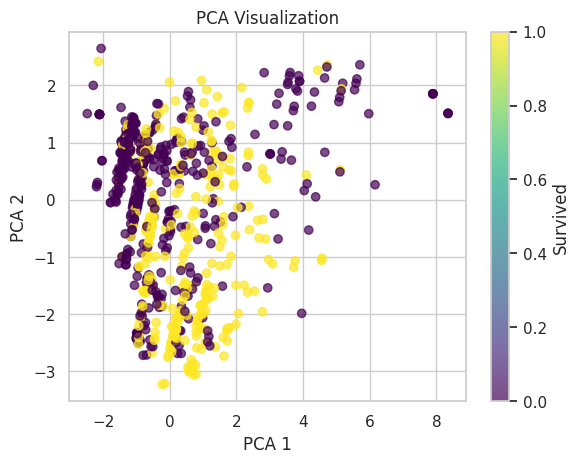

In [39]:
# Dimensionality Reduction - PCA Visualization

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_log', 'Embarked', 'FamilySize']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Survived'], cmap='viridis', alpha=0.7)
plt.title("PCA Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Survived')
plt.show()


In [41]:
# Saving final cleaned dataset

df.to_csv("titanic_cleaned_for_EDA.csv", index=False)